In [737]:
#import libraries
import random
import pandas as pd
import json
from user import UserData
from preprocessor import NLP #our natural language processing functions
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import datetime

pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", None)

In [738]:
def import_data(): #imports dataset as ["category", "user query", "chatbot response"]
    with open("data.json") as intent: #load jsons
        data = json.load(intent)
    df = pd.DataFrame(data['intents'])
    df2 = df[['intent', "text", "responses"]] #choose specific columns
    df2 = df2.rename(columns={"text":"in", "responses":"out"}) #making it more readable

    return df2

In [739]:
def get_tree():
    t = DecisionTreeClassifier(
        criterion="gini", 
        splitter="best",
        max_depth = 4,
        min_samples_leaf = 100,
        min_samples_split = 1000,
        random_state=1)
    
    df = import_data()
    return df

In [740]:
df = import_data()
df["intent"] = df["intent"].apply(lambda x: str.lower(x))
df["in"] = df["in"].apply(lambda x: [str.lower(n) for n in x])
# df["out"] = df["out"].apply(lambda x: [str.lower(n) for n in x])
df.head(5)

,intent,in,out
0,greeting,"[hi, hi there, hello, hello there, hey, hey th...","[Hi how are you?, Hello how are you?, Hey how ..."
1,gratitude,"[thanks, thank you!, thank you so much, i am v...","[No problem!, No problem, happy to help!, Of c..."
2,pranks,"[is lucas taller than noah?, did noah steal hi...","[Yes of course!, Clearly., Yeah duh]"
3,courtesygreeting,"[how are you?, hi how are you?, hello how are ...","[Good thanks! My name is chatbot, Good thanks!..."
4,nameresponse,"[my name is name, i am name, hi, im name!, my ...","[Nice to meet you <name>!, Ok, you are <name>...."


In [741]:
temp = pd.DataFrame(columns=["intent", "in", "out"])
for index, row in df.iterrows():
    for i in row["in"]:
        temp.loc[len(temp.index)] = [row["intent"], i, row["out"]]
df = temp.sort_values("intent")
df = df.reset_index()
df.drop("index", axis=1, inplace=True)
df.head(5)

,intent,in,out
0,clever,you are a very intelligent girl,"[Thank you, I was trained that way, I was trai..."
1,clever,genious,"[Thank you, I was trained that way, I was trai..."
2,clever,clever girl,"[Thank you, I was trained that way, I was trai..."
3,clever,you are very intelligent,"[Thank you, I was trained that way, I was trai..."
4,clever,you are very clever,"[Thank you, I was trained that way, I was trai..."


In [742]:
cvin = []
for i in df["in"]:
    cvin.append(i)

cv = CountVectorizer()
cvout = cv.fit_transform(cvin).toarray()
cvwords = cv.get_feature_names_out()

cvdf = pd.DataFrame(columns=cvwords, data=cvout)

df2 = pd.concat([df["intent"], cvdf], axis=1)
df2.head(5)

,intent,about,adios,am,any,anyone,are,aware,bay,be,bitch,bored,by,bye,call,camera,can,chatbotous,cheering,clever,code,communicating,conscious,could,did,do,doing,door,enough,for,friends,from,fuck,genious,get,girl,give,go,good,goodbye,gossip,got,grateful,have,hear,hello,help,hey,hi,his,hola,hope,how,identify,im,in,intelligent,is,it,joke,jokes,know,later,laugh,lucas,make,me,mean,meant,more,much,my,name,need,noah,not,off,open,please,pod,prove,quiet,saying,see,self,shhh,shit,shut,so,some,speaking,steal,stop,surely,talking,taller,tell,than,thank,thanks,the,there,they,think,time,to,understand,up,very,want,was,wasn,well,what,who,why,will,with,you,your
0,clever,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,clever,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,clever,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,clever,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,clever,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [743]:
nlp = NLP()

def get_intent(string): #string = user query
    arr = nlp.getlemmas(string)
    highscore = 0
    intent = ""
    for word in arr:
        for i, row in df.iterrows():
            score = 0
            try:
                if df.loc[i, word] == 1:
                    score += 1
            except:
                pass
            if score > highscore:
                intent = row["intent"]
    print(intent)
    print(df.iloc[df["intent"] == intent, 2])

In [744]:
x = df2.drop("intent", axis=1)
y = df2["intent"]

In [745]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1)

In [746]:
#make a model and fit to data
model = DecisionTreeClassifier(
    criterion="gini", 
    splitter="best",
    random_state=1)
model.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=1)

In [747]:
model.score(xtest, ytest)

0.6842105263157895

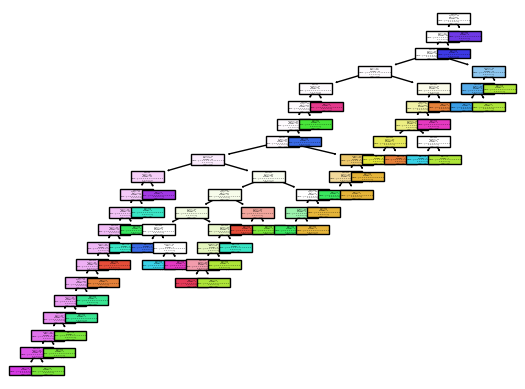

In [748]:
#yikes looks a little overfitted, but its to be expected with such a small dataset
_ = tree.plot_tree(model,
    node_ids=True,
    class_names=True,
    filled=True)

In [749]:
def predict(string): #string = "user input"
    #output: array for decision tree
    arr = nlp.getlemmas(string)

    temp = pd.DataFrame(columns=cvwords, data=[[0 for x in cvwords]])
    i = 0
    for col in temp.columns:
        for i in arr:
            if col == i:
                temp[col] = 1
    return model.predict(temp)[0]

def respond(string, user): #string = "user input"
    intent = predict(string)

    #update user data
    if intent == "nameresponse":
        name = nlp.get_ne(nlp.tokenize(string))
        for i in name:
            if i[1] == "PERSON":    
                user.name = i[0]

    colexists = False

    for i in df["intent"]:
        if i == intent:
            colexists = True

    if colexists:
        responses = df.loc[df["intent"] == intent, "out"]
        r = random.randint(0, len(responses.iloc[0]) - 1)
        choice = responses.iloc[0][r]
    
        tag = str(choice).find("<")
        if tag != -1:
            fulltag = str(choice).find(">") + 1 #length of tag
            #replace <tag> with user data
            choice = choice[0:tag] + get_data(choice[tag:fulltag], user) + choice[fulltag:len(choice)]
        
        return choice
        
    else:
        return "Sorry, I don't understand."
    
def get_data(string, user): #examples: <name>, <age>, <time>
    if string == "<name>":
        return user.getName()
    elif string == "<time>":
        return str(datetime.datetime.now().time())[:5] #get the current time

In [750]:
userinput = "[start conversation]"
print("-"  * 50)
print("You are now talking to chatbot. Enter \"quit\" to end conversation")
print("-"  *  50)
user = UserData()
first = True
#while loop
while not (userinput == "quit" or userinput == ""):
    if not(first): #you have to print response AFTER user input is checked by while loop
        print(userinput)
        print(">>>", respond(userinput, user))
    else:
        first = False;
    userinput = input()

end = df.loc[df["intent"] == "goodbye", "out"]
r = random.randint(0, len(end.iloc[0]) - 1)
finalchoice = end.iloc[0][r]
print(">>> " + finalchoice)


--------------------------------------------------
You are now talking to chatbot. Enter "quit" to end conversation
--------------------------------------------------
did noah steal his code from me?
>>> Yes of course!
>>> See you later
